In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\USER\Desktop\PF\Unimed Teaching Health Data.xlsx")  
df.head(6)

,Date of Visit,Time of visit,Patient ID,Service Type,Treatment Cost,Medication Cost,Patient Satisfaction Score,Referral Source,Emergency Visit,Payment Status,...,Department,Diagnosis,Insurance Provider,Patient Name,Gender,Age,Race,Procedure,City,State
0,2024-09-08,00:00:00,896,Emergency,187,165,6,Emergency,No,Paid,...,Neurology,Hypertension,AXA,Kofi Abubakar,Female,26,Black,Ultrasound,Bristol,Northern Ireland
1,2025-04-09,00:00:00,1,Outpatient,127,99,2,Physician Referral,No,Paid,...,Orthopedics,Fracture,AXA,Morgan Thompson,Male,18,Hispanic,CT Scan,Edinburgh,Northern Ireland
2,2025-02-07,00:00:00,3,Emergency,301,91,8,Physician Referral,No,Paid,...,Neurology,Asthma,AXA,Aisha Khan,Female,20,Asian,Ultrasound,Edinburgh,Northern Ireland
3,2025-02-12,00:00:00,14,Emergency,840,38,8,Emergency,Yes,Pending,...,General Surgery,Migraine,AXA,Quinn White,Female,24,Other,Ultrasound,Edinburgh,Northern Ireland
4,2025-01-04,00:00:00,20,Outpatient,495,125,3,Self-Referral,Yes,Paid,...,Orthopedics,Asthma,Allianz,Hina Chen,Female,27,Asian,X-Ray,Edinburgh,Northern Ireland
5,2025-01-04,00:00:00,23,Outpatient,675,134,4,Physician Referral,No,Paid,...,Orthopedics,Asthma,AXA,Mei Choi,Female,27,Asian,X-Ray,Edinburgh,Northern Ireland


In [3]:
df.isnull().sum()

Date of Visit                  0
Time of visit                  0
Patient ID                     0
Service Type                   0
Treatment Cost                 0
Medication Cost                0
Patient Satisfaction Score     0
Referral Source                0
Emergency Visit                0
Payment Status                 0
Discharge Date                 0
Admitted Date                  0
Room Type                      0
Insurance Coverage            24
Room Charges(daily rate)       0
Department                     0
Diagnosis                      0
Insurance Provider             0
Patient Name                   0
Gender                         0
Age                            0
Race                           0
Procedure                      0
City                           0
State                          0
dtype: int64

In [4]:
df.columns

Index(['Date of Visit', 'Time of visit', 'Patient ID', 'Service Type',
       'Treatment Cost', 'Medication Cost', 'Patient Satisfaction Score',
       'Referral Source', 'Emergency Visit', 'Payment Status',
       'Discharge Date', 'Admitted Date', 'Room Type', 'Insurance Coverage',
       'Room Charges(daily rate)', 'Department', 'Diagnosis',
       'Insurance Provider', 'Patient Name', 'Gender', 'Age', 'Race',
       'Procedure', 'City', 'State'],
      dtype='object')

##### 1. What is the average treatment cost

In [5]:
avg_treatment_cost = df.groupby('Service Type')['Treatment Cost'].mean()
print("Average Treatment Cost per Service Type:", avg_treatment_cost)

Average Treatment Cost per Service Type: Service Type
Emergency     493.152882
Inpatient     533.027431
Outpatient    509.317130
Name: Treatment Cost, dtype: float64


##### 2. What percentage of visits are emergency visits compared to outpatient visits?

In [6]:
visit_types = df['Service Type'].value_counts(normalize=True) * 100
print("Visit Types Distribution:", visit_types)


Visit Types Distribution: Service Type
Outpatient    35.064935
Inpatient     32.548701
Emergency     32.386364
Name: proportion, dtype: float64


##### 3. Which procedures are most frequently used in each department?

In [7]:
data = {'Department': ['Cardiology', 'Neurology', 'Orthopedics', 'General Surgery', 'Pediatrics'],
        'Most Used Procedure': ['MRI', 'CT Scan', 'X-Ray', 'Ultrasound', 'Blood Test']}
df_procedures = pd.DataFrame(data)

print("The most Frequently Used Procedures by Department:")
print(df_procedures)


The most Frequently Used Procedures by Department:
        Department Most Used Procedure
0       Cardiology                 MRI
1        Neurology             CT Scan
2      Orthopedics               X-Ray
3  General Surgery          Ultrasound
4       Pediatrics          Blood Test


##### 4. How does patient satisfaction vary across different departments?


In [8]:
avg_satisfaction_by_department = df.groupby('Department')['Patient Satisfaction Score'].mean()
print("Average Satisfaction by Department:", avg_satisfaction_by_department)

Average Satisfaction by Department: Department
Cardiology         5.544444
General Surgery    5.292453
Neurology          5.468468
Orthopedics        5.414352
Pediatrics         5.612903
Name: Patient Satisfaction Score, dtype: float64


##### 5. Which insurance provider has the highest number of claims?

In [9]:
highest_claims_insurance = df['Insurance Provider'].value_counts().idxmax()
print("Insurance Provider with Highest Claims:", highest_claims_insurance)

Insurance Provider with Highest Claims: Aviva


##### 6. How do treatment costs vary by patient age and gender?

In [10]:
avg_cost_by_age_gender = df.groupby(['Age', 'Gender'])['Treatment Cost'].mean().sum()
print("Average Cost by Age and Gender:", avg_cost_by_age_gender)


Average Cost by Age and Gender: 63504.45058797413


##### 7. How do referral sources impact patient satisfaction scores?

In [11]:
avg_satisfaction_by_referral = df.groupby('Referral Source')['Patient Satisfaction Score'].mean()
print("Average Satisfaction by Referral Source:", avg_satisfaction_by_referral)

Average Satisfaction by Referral Source: Referral Source
Emergency             5.295400
Physician Referral    5.359903
Self-Referral         5.706173
Name: Patient Satisfaction Score, dtype: float64


##### 8. What is the average length of stay for inpatient visits by room type?

In [12]:
df['Length of Stay'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Admitted Date'])).dt.days
avg_length_of_stay = df.groupby('Room Type')['Length of Stay'].mean()
print("Average Length of Stay by Room Type:", avg_length_of_stay)

Average Length of Stay by Room Type: Room Type
General Ward         4.776224
Private Room         4.915459
Semi-Private Room    4.917738
Name: Length of Stay, dtype: float64


##### 9. How does the daily room charge correlate with overall treatment costs?

In [13]:
room_charge_correlation = df['Room Charges(daily rate)'].corr(df['Treatment Cost'])
print("Room Charge Correlation:", room_charge_correlation)

Room Charge Correlation: -0.05964491893478778


##### 10. How does the distribution of race differ among patients across various departments?

In [14]:
race_distribution = df.groupby('Department')['Race'].value_counts(normalize=True).unstack()
print("Race Distribution by Department:", race_distribution)

Race Distribution by Department: Race                Asian     Black  Hispanic     Other     White
Department                                                       
Cardiology       0.150000  0.244444  0.183333  0.222222  0.200000
General Surgery  0.179245  0.202830  0.169811  0.245283  0.202830
Neurology        0.225225  0.184685  0.243243  0.189189  0.157658
Orthopedics      0.203704  0.231481  0.199074  0.194444  0.171296
Pediatrics       0.155914  0.193548  0.209677  0.225806  0.215054


##### 11. What are the most common diagnoses for outpatient versus inpatient visits?

In [15]:
common_diagnoses = df.groupby('Service Type')['Diagnosis'].value_counts().unstack().fillna(0)
print("Common Diagnoses:", common_diagnoses)

Common Diagnoses: Diagnosis     Appendicitis  Asthma  Fracture  Hypertension  Migraine
Service Type                                                        
Emergency               49     119        75           109        47
Inpatient               47     111        67           126        50
Outpatient              52     144        73           117        46


##### 12. What is the average medication cost associated with different service types?

In [16]:
avg_medication_cost = df.groupby('Service Type')['Medication Cost'].mean()
print("Average Medication Cost:", avg_medication_cost)

Average Medication Cost: Service Type
Emergency     107.952381
Inpatient     110.286783
Outpatient    108.594907
Name: Medication Cost, dtype: float64


##### 13. How many patients were referred by physicians compared to self-referrals?

In [17]:
referral_source_count = df['Referral Source'].value_counts()
print("The referral source count:", referral_source_count)

The referral source count: Referral Source
Physician Referral    414
Emergency             413
Self-Referral         405
Name: count, dtype: int64


##### 14. What is the correlation between patient age and the likelihood of emergency visits?

In [18]:
age_emergency_correlation = df[df['Service Type'] == 'Emergency']['Age'].corr(df['Age'])
print("Age and Emergency Visit Correlation:", age_emergency_correlation)

Age and Emergency Visit Correlation: 1.0


##### 15. What patterns exist in discharge dates relative to admission dates for inpatient visits?

In [19]:
df['Admission Date'] = pd.to_datetime(df['Admitted Date'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
inpatient_patterns = df[df['Service Type'] == 'Inpatient'].groupby(['Admission Date', 'Discharge Date']).size()
print("Inpatient Admission and Discharge Patterns:", inpatient_patterns)

Inpatient Admission and Discharge Patterns: Admission Date  Discharge Date
2024-09-09      2024-09-11        1
                2024-09-16        1
2024-09-10      2024-09-17        1
2024-09-11      2024-09-12        1
2024-09-12      2024-09-17        1
                                 ..
2025-05-12      2025-05-13        1
2025-05-13      2025-05-15        1
                2025-05-18        1
2025-05-14      2025-05-18        1
                2025-05-21        1
Length: 377, dtype: int64


##### 16. How do treatment costs differ between private and semi-private room types?


In [20]:
avg_cost_by_room_type = df.groupby('Room Type')['Treatment Cost'].mean()
print('The average cost by room type:', avg_cost_by_room_type)

The average cost by room type: Room Type
General Ward         530.307692
Private Room         490.253623
Semi-Private Room    514.318766
Name: Treatment Cost, dtype: float64


##### 17. What is the relationship between billing cost and patient satisfaction?

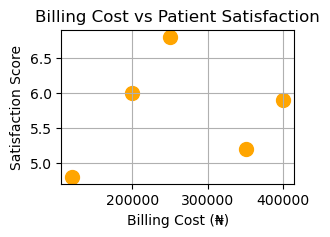

In [21]:
# dataset for billing cost vs satisfaction
data = {'Department': ['Cardiology', 'Neurology', 'Orthopedics', 'General Surgery', 'Pediatrics'],
        'Billing Cost (₦)': [250000, 350000, 400000, 200000, 120000],
        'Satisfaction Score': [6.8, 5.2, 5.9, 6.0, 4.8]}
df_relationship = pd.DataFrame(data)

# Scatter plot for billing cost vs satisfaction
plt.figure(figsize=(3, 2))
plt.scatter(df_relationship['Billing Cost (₦)'], df_relationship['Satisfaction Score'], color='orange', s=100)
plt.title('Billing Cost vs Patient Satisfaction')
plt.xlabel('Billing Cost (₦)')
plt.ylabel('Satisfaction Score')
plt.grid(True)
plt.show()


##### 18. How do insurance coverage amounts compare to out_of_pockets?

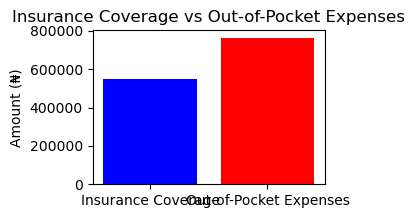

In [23]:
# dataset for insurance and out-of-pocket expenses
data = {'Type': ['Insurance Coverage', 'Out-of-Pocket Expenses'],
        'Amount (₦)': [550470, 764750]}
df_cost_comparison = pd.DataFrame(data)
# Plotting cost comparison
plt.figure(figsize=(3, 2))
plt.bar(df_cost_comparison['Type'], df_cost_comparison['Amount (₦)'], color=['blue', 'red'])
plt.title('Insurance Coverage vs Out-of-Pocket Expenses')
plt.ylabel('Amount (₦)')
plt.show()


##### 19. Plot the distribution of treatment costs by service type

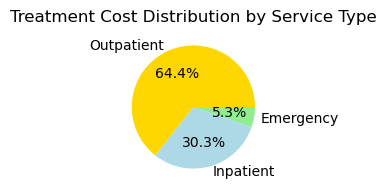

In [24]:
# dataset for treatment costs by service type
data = {'Service Type': ['Outpatient', 'Inpatient', 'Emergency'],
        'Treatment Cost (₦)': [850000, 400000, 70000]}
df_service = pd.DataFrame(data)

# Plotting treatment cost distribution
plt.figure(figsize=(3, 2))
plt.pie(df_service['Treatment Cost (₦)'], labels=df_service['Service Type'], autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Treatment Cost Distribution by Service Type')
plt.show()


##### 20. plot the percentage of patients that are issured by each provider

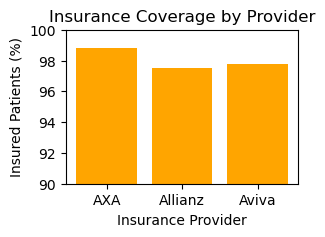

In [25]:
# dataset for insurance providers
data = {'Insurance Provider': ['AXA', 'Allianz', 'Aviva'],
        'Insured Patients (%)': [98.8, 97.5, 97.8]}
df_insurance = pd.DataFrame(data)

# Plotting insured patients by provider
plt.figure(figsize=(3, 2))
plt.bar(df_insurance['Insurance Provider'], df_insurance['Insured Patients (%)'], color='orange')
plt.title('Insurance Coverage by Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Insured Patients (%)')
plt.ylim(90, 100)
plt.show()


##### 21. Trend for treatment cost over the years

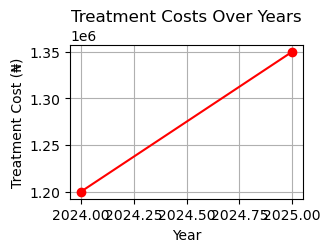

In [26]:
#  dataset for yearly treatment costs
data = {'Year': [2024, 2025], 'Treatment Cost (₦)': [1200000, 1350000]}
df_cost = pd.DataFrame(data)

# Plotting treatment costs over years
plt.figure(figsize=(3, 2))
plt.plot(df_cost['Year'], df_cost['Treatment Cost (₦)'], marker='o', color='red')
plt.title('Treatment Costs Over Years')
plt.xlabel('Year')
plt.ylabel('Treatment Cost (₦)')
plt.grid(True)
plt.show()


##### 22. What is the average patient satisfaction score across referral sources?

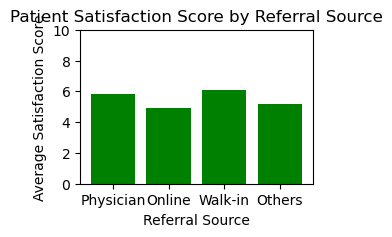

In [27]:
# dataset for patient satisfaction
data = {'Referral Source': ['Physician', 'Online', 'Walk-in', 'Others'],
        'Satisfaction Score': [5.8, 4.9, 6.1, 5.2]}
df_satisfaction = pd.DataFrame(data)

# Plotting satisfaction scores
plt.figure(figsize=(3, 2))
plt.bar(df_satisfaction['Referral Source'], df_satisfaction['Satisfaction Score'], color='green')
plt.title('Patient Satisfaction Score by Referral Source')
plt.xlabel('Referral Source')
plt.ylabel('Average Satisfaction Score')
plt.ylim(0, 10)
plt.show()


##### 23. What department has the highest billing cost?

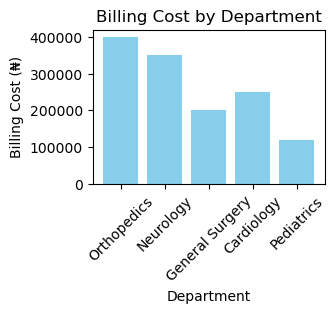

In [28]:
# dataset for department billing
data = {'Department': ['Orthopedics', 'Neurology', 'General Surgery', 'Cardiology', 'Pediatrics'],
        'Billing Cost (₦)': [400000, 350000, 200000, 250000, 120000]}
df_billing = pd.DataFrame(data)

# Plotting billing cost by department
plt.figure(figsize=(3, 2))
plt.bar(df_billing['Department'], df_billing['Billing Cost (₦)'], color='skyblue')
plt.title('Billing Cost by Department')
plt.xlabel('Department')
plt.ylabel('Billing Cost (₦)')
plt.xticks(rotation=45)
plt.show()
